# CART (Classification & Regression Tree)

Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

**Dikkat!** Bir karar ağacında en tepede görülen değişken en önemli değişkendir. 

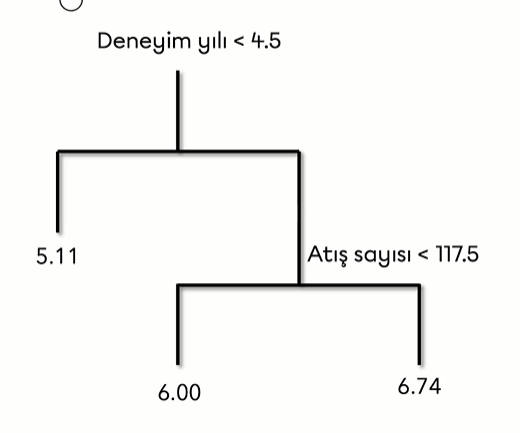

Hitters veri setinden alınan deneyim yılı, atış sayısı ve maaş değişkenlerinden oluşturulan karar ağacı yukarıdaki gibidir. En aşağıda bulunan değerler bağımlı değişkenimiz, yani maaş verileridir. En tepede bulunan değişken deneyim yılı yani en önemli değişken, ondan sonraki en önemli değişken ise atış sayısı değişkenidir. 

Örnek olarak atış sayısının 117.5'den küçük olursa sol taraf, büyük olursa sağ taraftan gidileceğini ayırt eden o 117.5 değeri **iç düğüm noktası**, **bölüm noktasıdır**.

Örnek olarak yukarıdaki ağacın iki tane *iç düğüm noktası (internal node)*, üç tane *son düğüm noktası (terminal node)* vardır. Son düğüm noktalarına *yapraklar* da denir.

*Yapraklardaki değerler neye göre belirleniyor?*

İç düğüm noktasının ayırdığı değerlerin ortalamaları alınarak yapraklar belirlenir. Örnek olarak yukarıdaki ağaçta, deneyim yılı 4.5'ten küçük olanlar 5.11 maaş alıyorlarmış. Bu 5.11 değeri, deneyim yılı 4.5'ten küçük olanların maaş değerlerinin ortalaması alınarak hesaplandı.

*İç düğüm noktaları nasıl belirleniyor? Bunu excelde yapamaz mıydık, makine öğrenmesine ne gerek var?*

İç düğüm noktaları, değişkenlerin ortalama kareler hatalarının hesaplanması ile bulunur. Sırası ile her bir gözlem biriminden değişken ikiye bölünür ve ikiye bölünen değişkenin gözlem birimlerinin bağımlı değişken ortalamaları alınır. Böylece her iki kısım için ortalama bağımlı değişken bulunmuş olur.

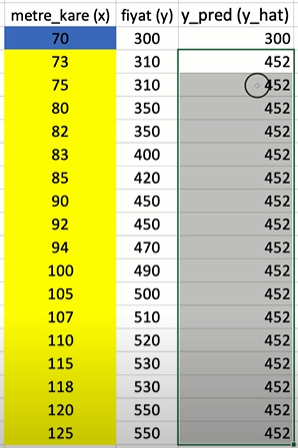

Örnek olarak yukarıdaki veri setinde metre kare değişkeni 70 değerinden iki kısma bölünmüş. Her bir gözlem biriminin bağımlı değişken değeri fiyat değişkeninde belirtilmektedir. Ayrılan sınıfların her bir elemanının bağımlı değişkenlerinin toplanmasıyla ortalamaları alınır. y_pred dediğimiz yani tahmin edilen değer dediğimiz değerler, ilgili yapraktaki bağımlı değişkenin ortalamasıdır. Böylece sağdaki y_pred değişkeni oluşturulmuş olur. Burada modelin, her bir metre karede tahmin edeceği fiyatın bilgisi yer alır.

Bağımsız değişkeni 70 değerinden böldüğümüzde, gerçek y değerleri ile tahmin ettiğimiz y değerlerinin farklarını alarak bu bölme işlemine ilişkin hata değerini hesaplamış oluruz.

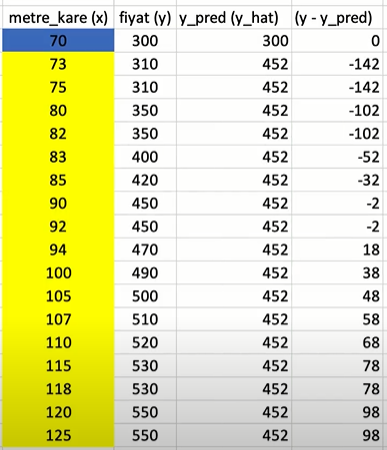

En sağdaki sütun, gözlem birimlerinin gerçek y değerleri ile tahmin edilen y değerlerinin farklarını gösterir. Bu elde edilen farkların karelerini alıp toplarsa, SSE (hata kareler toplamı - sum of squared error) değerini bulmuş oluruz.

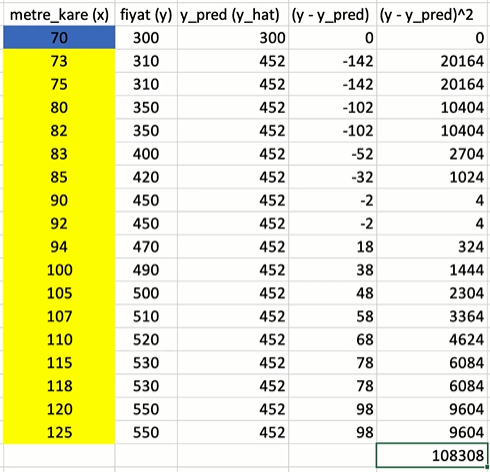

Bağımsız değişkenimizi bu noktadan böldüğümüzde elde ettiğimiz SSE değerimiz 108308'dir.

Regresyon problemlerindeki problemimiz, doğruyu nereye koyacağımız idi. Ağaç yöntemlerinde de bağımsız değişkenleri nereden böleceğiz problemi var. Bu problemin de yukarıdaki gibi değişkeni böldükten sonra hesapladığımız SSE değerlerinin kıyaslanması ile önüne geçebiliriz.

Yukarıdaki veri setimizde bağımlı değişkenimizi şimdi tekrar, fakat farklı bir noktadan bölüp değerlendirelim.

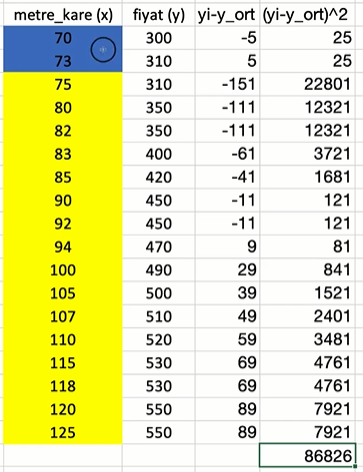

Yukarıdaki işlemlerin aynısı farklı bir noktadan bölerek yaptığımızda, bu sefer SSE değeri 86826 bulunmuştur.

Yani bölme noktamız değiştikçe hesapladığımız hata değerleri de değişecektir. Biz de bu hata değerlerine bakarak nereden böleceğimizi kararlaştıracağız.

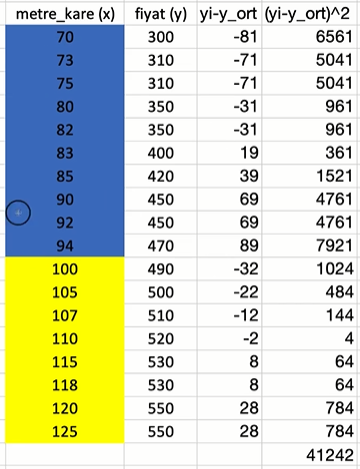

Başka bir örnek, bağımsız değişenimizi 94 noktasından böldüğümüzde ve işlemleri gerçekleştirdiğimizde elde edeceğimiz hata değeri 41242'dir. Bağımsız değişkenleri her bir gözlemden bölüp hataları hesaplayacağız. Bize en düşük hatayı veren gözlem noktası ise, o bağımsız değişkeni bölmemiz gereken nokta olacaktır.

*Peki burada 1 tane değil de 10 tane değişken olsaydı ne olacaktı?*

Bu şekilde bütün değişkenler tek tek gezilecekti.Hepsine yukarıda metre kare değişkenine yaptığımız işlemleri yapacaktık (küçükten büyüğe sıralayacağız, çeşitli ayrım noktalarına göre SSE'lerine bakacağız). Bunun neticesinde, **en düşük hatayı veren değişken en önemli değişken olup en tepede yer alacaktı**. Bu önem düzeyine göre değişkenlerin dallanmaları gerçekleşiyor olacaktı. 

Buradaki MSE değerini o SSE değerinin ortalamasını alarak buluruz. MAE değerini, kareler alınmadan önce bulduğumuz farkların mutlak değerlerini alıp ortalamasını alarak hesaplarız. RMSE ise MSE değerinin karekökü alınarak bulunur

Yukarıdaki hesapladığımız hata değerine bakarak en düşük hatanın 94 noktasında elde ettiğimizi gördük. Bundan dolayı bu değişkeni 94 noktasında böldüğümüzü düşünelim. Ondan sonra ne olacaktı?

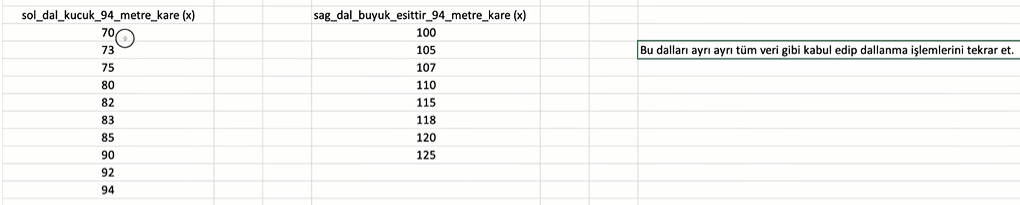

Yukarıdaki görselde bölme işlemini gerçekleştirditekn sonra elde ettiğimiz gözlem birimleri var. Bu dalları ayrı ayrı tüm veri gibi kabul edip dallanma işlemlerini tekrar edeceğiz. 

Her seferinde elimizdeki gözlem birimleri tekrar tekrar belirli bir derinliğe kadar bölünüyor olacak. Fakat burada model ne kadar böleceğini bilmiyor. Bunun değeri ne olmalı?

Yine aynı şekilde eğer model bölme işlemleri sonucunda o değişkenden elinde sadece 2 gözlem kaldıysa onu da mı bölmeli? Eğer bölerse hata oranı düşer fakat model overfit etmiş olur. Bölmez ise hata oranı artar fakat modelin genellenebilirliği korunmuş olur.

Görüldüğü üzere 2 tane problemimiz bulunuyor:
1. Ne kadar dallanma gerçekleşecek? (**Max Depth**. 2 seviye mi? 3 seviye mi? Ne kadar derine ineceğiz? Yukarıdaki örnekte 1 seviye indik.)
2. Yeni oluşturulan dalda örnek olarak 3 değer kalırsa bölme işlemi devam edilecek mi? (**Min Samples Split** argümanı)

### Sınıflandırma Problemleri için Cost/Loss/Objective Fonksiyonu

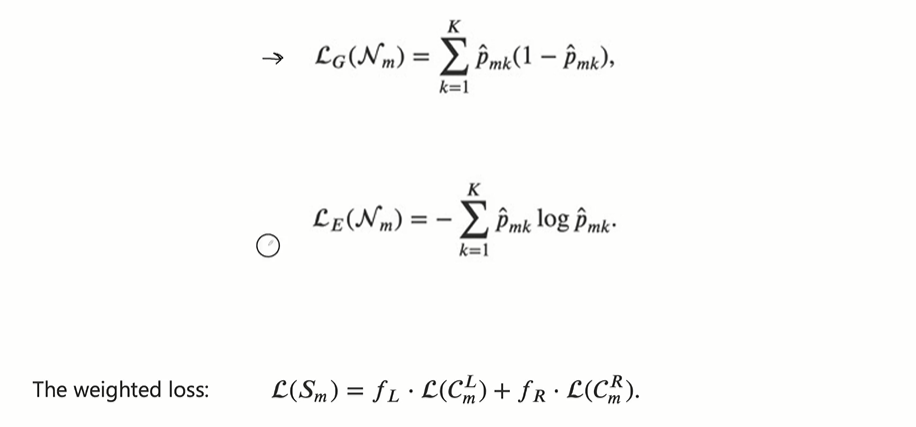

Bir sınıflandırma problemi için *gini* (üstteki fonksiyon) katsayısını kullanabiliriz veya *entropy*'i (ortadaki fonksiyon) kullanabiliriz. Entropy değerleri ve gini değerleri bize tahminlerimizin başarısına yönelik bir bilgi sağlar. Buradaki başarı metriklerine göre dallanmalara karar verilir.  

Regresyon bölümünde kullandığımız SSE idi.  Burada kullanacak olduklarımız ise sınıflandırma problemleri için odak fonksiyonlarımız, bunlara da genelde *saflık ölçüleri* denir (benzerlik-benzemezlik). Ne kadar düşükse o kadar iyidir.

Gini üzerinden örnek vermek gerekirse, yukarıdaki gini fonksiyonunu kullanarak bir gini değeri elde ederiz. Eğer ilgili yaprakta gini değerimiz 0 çıkarsa o yaprağın artık dallanmasına gerek yoktur. Eğer 0'dan büyük bir değer çıkarsa da dallanma işlemi devam eder.

## Decision Tree Classification: CART

Bu kısımda yapacağımız işlemler:

1. Exploratory Data Analysis
2. Data Preprocessing & Feature Engineering
3. Modeling using CART
4. Hyperparameter Optimization with GridSearchCV
5. Final Model
6. Feature Importance
7. Analyzing Model Complexity with Learning Curves (BONUS)
8. Visualizing the Decision Tree
9. Extracting Decision Rules
10. Extracting Python/SQL/Excel Codes of Decision Rules
11. Prediction using Python Codes
12. Saving and Loading Model

In [2]:
# indirilmesi gerek ek kütüphaneler
# pip install pydotplus 
# pip install skompiler
# pip install astor 
# pip install joblib

In [3]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile

warnings.simplefilter(action='ignore', category=Warning)

## 1. Exploratory Data Analysis

Buraları es geçiyorum şimdilik. Daha sonrasında tekrar dönüp uygulama yapacağım.

## 2. Data Preprocessing & Feature Engineering

Buraları es geçiyorum şimdilik. Daha sonrasında tekrar dönüp uygulama yapacağım.

## 3. Modeling using CART

In [4]:
df = pd.read_csv('datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [7]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

In [8]:
# confusion matrix için y_pred
y_pred = cart_model.predict(X)

In [9]:
# AUC için y_prob
y_prob = cart_model.predict_proba(X)[:, 1]

In [10]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [11]:
# AUC
roc_auc_score(y, y_prob)

1.0

Yukarıdaki sonuçlarda görüldüğü gibi modelimiz %100 başarılı bir şekilde tahminlerini gerçekleştirmiş. Hem accuracy hem auc scorelarında 1 sonucunun çıkmasını bunu gösteriyor. Peki bu bizim için iyi bir durum mu? Bu sonuçları modelimizin overfit etmesi olarak mı yoksa başarı olarak mı kabul etmeliyiz?

*Başarımı nasıl daha doğru değerlendirebilirim?*

### Holdout Yöntemi ile Başarı Değerlendirme

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [13]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

Veri setimizi train ve test olmak üzere ikiye ayırdık. Train seti ile modelimizi kurduk. Bu noktada hem train hatasına hem de test hatasına bakabiliriz. 

In [14]:
# train hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

In [15]:
# test hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



0.6739506172839506

Hem train setinin hem de test setinin sonuçları yukarıdaki gibidir. Gözlemliyoruz ki model eğitildiği veride performansı çok yüksek, ama görmediği bir veriyi sorduğumuzda aynı performansı gösteremedi. Dolayısıyla modelimiz overfit oldu.

Fakat yine de bu sonuç da güvenilir bir sonuç değil. Çünkü yukarıda veri setini bölerken *random_state* parametresini 17 girmiştik. Bu parametrenin 17 olduğu bölünmede sonuçlar yukarıdaki gibi fakat veri setini yine aynı oranda ama bu sefer farklı bir yerden bölersek yine aynı sonuçları elde edebilir miyiz? Hayır edemeyiz. Veri setinin bölünme noktalarına göre sonuçlarımız değişecektir. 

Bundan dolayı çapraz doğrulama yapmamız lazım. 

### CV ile Başarı Değerlendirme

In [16]:
cart_model = DecisionTreeClassifier(random_state=17)

In [17]:
cv_results = cross_validate(cart_model,
                           X, y,
                           cv=5,
                           scoring=['accuracy', 'f1', 'roc_auc'])

5 katlı çapraz doğrulama işlemi yaptık. Şimdi sonuçları inceleyelim.

In [18]:
print("Accuracy: ",cv_results['test_accuracy'].mean())
print("F1: ",cv_results['test_f1'].mean())
print("ROC-AUC: ",cv_results['test_roc_auc'].mean())

Accuracy:  0.7058568882098294
F1:  0.5710621194523633
ROC-AUC:  0.6719440950384347


Şu anki elde ettiğimiz hattalar daha güvenilir hatalardır.    

Modelimizi doğruladığımız halde yine de başarılarımız düşük. Bu sonuçları yükseltmek için hiperparametre optimizasyonu yapacağız.

## 4. Hyperparameter Optimization with GridSearchCV

Kurduğumuz modelin parametrelerinin ne olduğunu görmek için *get_params* metodunu kullanabiliriz.

In [19]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 17,
 'splitter': 'best'}

Buradan *max_depth* ve *min_samples_split* parametrelerini kullanarak farklı kombinasyonlar üretmek istiyoruz. Dolayısıyla öncelikle bu değerlerin tutulduğu bir sözlük yapısı oluşturmamız gerekiyor.

In [20]:
cart_params = {'max_depth': range(1,11),
              'min_samples_split': range(2, 20)}

In [21]:
cart_best_grid = GridSearchCV(cart_model,
                             cart_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   13.2s finished


Toplam 180 kombinasyon içerisinden 900 kere fit işlemi gerçekleştirildi. Şimdi en iyi parametrelerimiz hangileriymiş görelim.

In [22]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

Peki bu en iyi parametrelere karşılık en iyi score hangisidir?

In [23]:
cart_best_grid.best_score_

0.7500806383159324

Yukarıdaki score değeri (0.75) accuracy değeridir. GridSearchCV içerisinde *scoring* adında bir parametre bulunuyor ve bu parametrenin ön tanımlı değeri *accuracy*'dir. Dolayısıyla bu parametreye f1 girersek f1 score'u, roc_auc girersek roc_auc score'u hesaplanacaktır.

**Dikkat!** GridSearchCV nesnesi (burada cart_best_grid), aslında içerisinde en iyi modeli saklar. Yani aslında final modelimiz zaten kendisidir. Örnek olarak veri seti içerisinden bir gözlemi seçelim ve bu nesneden tahmin etmesini isteyelim.

In [24]:
random = X.sample(1, random_state=45)

In [25]:
cart_best_grid.predict(random)

array([1], dtype=int64)

Tahminimiz geldi. Yani arama işlemleri neticesinde bulunan en iyi parametrelerle GridSearchCV metodu modeli kurar. İstenirse o model kullanılabilir.

## 5. Final Model

In [26]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)
# ** olan ifade, cart_best_grid.best_params_ içerisindeki parametrelerin otomatik olarak modele girilmesi içindir.

Yukarıdaki kod, en iyi parametreler ile final model kurulmasının bir yoluydu. Bir başka yol ise önceden kurduğumuz bir modelin parametrelerini değiştirmek.

In [27]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)
# cart_best_grid içerisindeki parametreler, daha önce oluşturmuş olduğumuz cart_model modelimizin parametreleri olarak girildi

Şimdi final modelimizin cross validate hatalarına bakalım.

In [28]:
cv_results = cross_validate(cart_final,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "f1", "roc_auc"])

In [29]:
print("Accuracy: ",cv_results['test_accuracy'].mean())
print("F1: ",cv_results['test_f1'].mean())
print("ROC-AUC: ",cv_results['test_roc_auc'].mean())

Accuracy:  0.7500806383159324
F1:  0.614625004082526
ROC-AUC:  0.797796645702306


Hiçbir veri önişleme ve özellik çıkarımı işlemleri yapmadan, sadece gridsearch ile parametre optimizasyonu yaparak başarı oranımızı yükseltmeyi başardık.

## 6. Feature Importance

Burada, elimizdeki değişkenlerin regresyon ya da sınıflandırma probleminde sağladığı katkılara göre önemlerinin sıralanması söz konusudur. Bir değişkenin önemli olması, o değişkenin hatalarının en düşük olması ile olur.

In [30]:
cart_final.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

Yukarıda her bir değişkenimizin katkı değerleri gözlemlenmektedir. Fakat bu şekilde hiçbir anlam ifade etmemektedirler. Bundan dolayı bunları görselleştirebileceğimiz bir fonksiyon kullanacağız.

In [31]:
def plot_importance(model, features, num=len(X), save=False):
    # featureların katkı değerleri ve bu featureların isimlerinin tutulduğu bir df oluşturulması
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    # oluşturduğumuz df'nin bir sütun grafik ile görselleştirilmesi
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value', ascending=False)[0:num]) # num parametresi df içerisinden kaç tane değişkenin grrafikte yer alacağını belirleyen parametre
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    
    if save: # eğer save parametresi true olarak girilirse, oluşturulan grafik aşağıdaki isim ile dosyaya kaydedilir
        plt.savefig('importances.png')

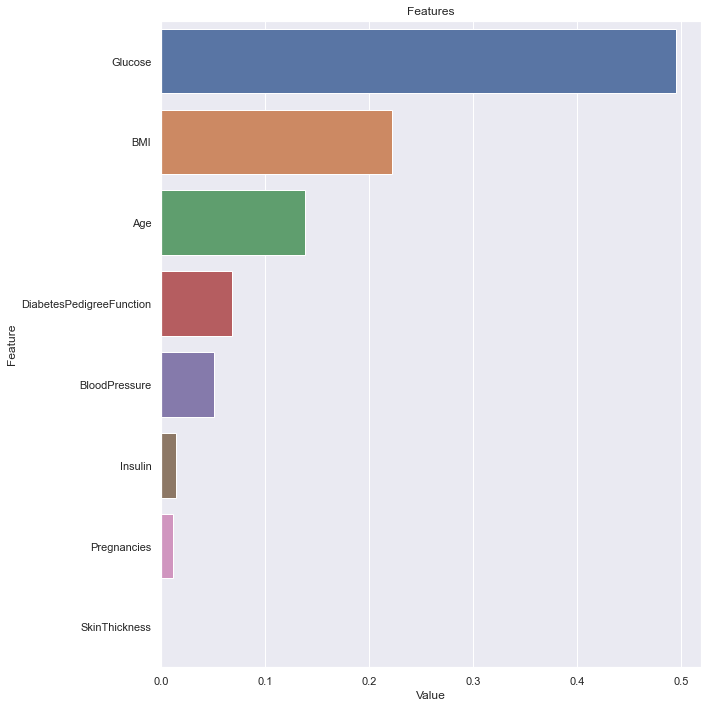

In [32]:
plot_importance(cart_final, X)

Yukarıdaki grafiğe göre, modelimizdeki en önemli değişkenler *Glucose, BMI* ve *Age*'dir. Eğer yeni featurelar oluşturacaksak bu üç değişkeni de kullanırsak oluşturacak olduğumuz değişkenlerin de model için katkı değeri yüksek featurelar olabilir.

## Analyzing Model Complexity with Learning Curves (BONUS)

**(Öğrenme Eğrileri ile Model Karmaşıklığını Analiz Etme)**

Daha önceki konularda, modelin train ve test verilerinden yaptığı tahminlerin score'larını bir grafik üzerinde çizdirerek, modelin overfit edip etmediğini gözlemlemiştik. Model karmaşıklığı arttıkça, train hatasının düştüğünü, test hatasının ise bir süre düştükten sonra artmaya başladığını görmüştük. Bunun önüne geçmek için model karmaşıklığının azaltılmamız ve optimum noktayı seçmemiz gerekiyordu. Burada bu konuyu ele alıyor olacağız. *validation curve* isimli bir metod kullanacağız.

Modelimiz içerisinden bir tane parametre seçip bu parametreye göre öğrenme eğrilerini yazdırmak istiyoruz. validation_curve bize nümerik olarak bazı çıktılar verecek, sonrasında biz bu çıktıları görselleştireceğiz.

In [33]:
train_score, test_score = validation_curve(cart_final, X, y, 
                                           param_name="max_depth", 
                                          param_range=range(1, 11),
                                          scoring="roc_auc",
                                          cv=10)

In [34]:
train_score

array([[0.72320885, 0.72306132, 0.68555095, 0.72350392, 0.71698479,
        0.7011941 , 0.66131397, 0.71142923, 0.71549128, 0.71120294],
       [0.7987598 , 0.79874136, 0.76659751, 0.8000461 , 0.80217151,
        0.77901798, 0.76472568, 0.79175657, 0.80145087, 0.79440771],
       [0.84255417, 0.84810512, 0.82195943, 0.84559705, 0.8434532 ,
        0.81859843, 0.82218534, 0.83455048, 0.8413315 , 0.84593664],
       [0.8834947 , 0.88264638, 0.86355002, 0.88926233, 0.88226372,
        0.87104195, 0.86404334, 0.87285846, 0.87436639, 0.87684114],
       [0.91531581, 0.9138497 , 0.89976487, 0.92513601, 0.91451821,
        0.90380821, 0.88505302, 0.90792531, 0.91068411, 0.90586318],
       [0.94068234, 0.94559244, 0.92840479, 0.94609959, 0.94535731,
        0.9309728 , 0.91167819, 0.93286307, 0.94030303, 0.93088154],
       [0.96760258, 0.96744583, 0.95147533, 0.96842785, 0.96832181,
        0.95850161, 0.93983864, 0.96071   , 0.96145546, 0.95757576],
       [0.97867681, 0.98590595, 0.9736606

In [35]:
test_score

array([[0.64777778, 0.64925926, 0.68074074, 0.64481481, 0.64222222,
        0.68481481, 0.63666667, 0.75333333, 0.71692308, 0.75615385],
       [0.73407407, 0.74888889, 0.73555556, 0.71592593, 0.61703704,
        0.77777778, 0.70481481, 0.82555556, 0.74615385, 0.80038462],
       [0.78407407, 0.81333333, 0.77222222, 0.68296296, 0.69296296,
        0.82925926, 0.79259259, 0.85814815, 0.72615385, 0.80807692],
       [0.76481481, 0.81148148, 0.74962963, 0.60740741, 0.70888889,
        0.82111111, 0.83851852, 0.87333333, 0.77038462, 0.81961538],
       [0.73444444, 0.78666667, 0.76333333, 0.60037037, 0.71925926,
        0.84814815, 0.80074074, 0.88296296, 0.75730769, 0.81769231],
       [0.72814815, 0.77962963, 0.7462963 , 0.59481481, 0.76259259,
        0.82740741, 0.81592593, 0.83185185, 0.76038462, 0.77692308],
       [0.74222222, 0.77888889, 0.75222222, 0.54296296, 0.71851852,
        0.75444444, 0.82481481, 0.8462963 , 0.67346154, 0.76961538],
       [0.71481481, 0.7137037 , 0.7522222

İlgili parametreyi denemesi için 10 tane değer verdik. Model sırası ile 1-10 arasında değerler alıp, her bir değer alışında roc_auc score'ları hesaplandı. Fakat aynı zamanda 10 katlı cross validation da yaptığımız için, modelin parametresi için her bir değer alışında o değer için sırası ile 10 tane train ve test ayrımı yapılıp hepsi ile bir roc_auc değeri hesaplanacak. Yani, her bir parametre değerinde 10 tane roc_auc score'u olacak. Yukarıdaki çıktıya detaylı bakıldığı zaman 10 tane array ve her bir array kendi içerisinde 10 tane değerden oluşan liste barındırıyor. Dolayısıyla bizim bu parametre değerlerinden elde ettiğimiz roc_auc scorelarının ortalamarını almamız gerekiyor.

In [36]:
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

In [37]:
mean_train_score

array([0.70729413, 0.78976751, 0.83642714, 0.87603684, 0.90819184,
       0.93528351, 0.96013549, 0.97716774, 0.98781586, 0.99359846])

In [38]:
mean_test_score

array([0.68127066, 0.74061681, 0.77597863, 0.77651852, 0.77109259,
       0.76239744, 0.74034473, 0.7137265 , 0.69966524, 0.69232051])

Artık her bir parametre değerinde, bir tane ortalama cross validation hatası olmuş oldu.

Şimdi train ve test hatalarını birlikte görselleştirip, ayrım noktalarına göre karar vermeye çalışacağız.

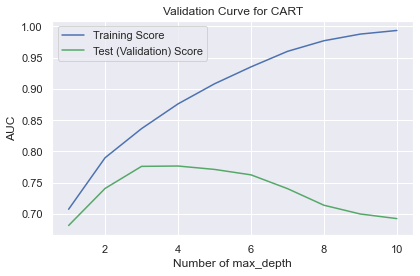

In [39]:
plt.plot(range(1, 11), mean_train_score,
        label='Training Score', color='b')

plt.plot(range(1, 11), mean_test_score,
        label='Test (Validation) Score', color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

max_depth değişkenimiz sırası ile 1'den 10'a kadar değer aldığında, train başarımız gittikçe artıyor. Fakat test başarımız max_depth değişkenimizin 3'ten sonra aldığı değerlerl ile gittikçe düşmeye başladığını gözlemliyoruz. Yani modelimiz karmaşıklaştıkça, genellenebilirlik yeteneğinin kaybolduğunu ve modelin overfit etmeye başladığını görüyoruz.

**Dikkat!** Biz daha önce hiperparametrelere yani olası kombinasyonlara bakıp zaten seçeceğimizi seçtik. max_depth 5, min_samples 4 değerleri bizim için en verimli modeli veriyordu. Fakat yukarıdaki grafiğe baktığımızda max_depth değişkeni için en verimli değerin 3 olması gerektiği gözlemleniyor. 

Buradaki hiperparametrelerin etkilerini eşanlı olarak değerlendiriyoruz. Yani max_depth'i tek başına oynattığımızda grafikteki etkiyi görüyoruz ama max_depth'i 3, min_samples_split'i 5 yaptığımızdaki skora bakmıyoruz burada. Burada max_depth hiperparametresine tek başına bakıyoruz model karmaşıklığı için. Yani yukarıdaki grafikte yaptığımız işlemi bir fikir edinmek için yapıyoruz. Biz normalde hiperparametre optimizasyonu bölümünde hiperparametrelerin optimum değerlerini zaten seçtik. Burada fikir vermesi açısından, diğer elde ettiğimiz sonuçlara yakın mı, doğruluyor mu, burada elde ettiğimiz ile oradaki örtüşüyor mu diye bakmaya çalışıyoruz. Yani tek başına grafiğe bakarak "max_depth için en optimum nokta 3müş o zaman max_depth değerim 3 olmalı" diyemiyoruz. Çünkü burada sadece max_depth'i değerlendirdik. Hiperparametre optimizasyonunda bütün girilen hiperparametreler kendi aralarında değerlendirilerek en optimum nokta seçiliyor. Bundan dolayı GridSearchCV yaptığımızda max_depth parametremizin en optimum noktası buradaki grafiğin aksine 5 çıkmıştı.

Buradaki grafiği sadece hiperparametre optimizasyon bölümünde belirlediğimiz değerleri karşılaştırmak için kullanıyoruz. GridSearchCV kısmında max_depth için optimum nokta 5 çıkmıştı. Buradaki grafikte tek başına değerlendirildiğinde de 3 çıkmış. Dolayısıyla önceden elde ettiğimiz 5 değeri tutarlı gibi gözüküyor, çok ciddi bir fark yok.

Şimdi yukarıdaki işlemleri bir fonksiyon içerisinde yazalım.

In [40]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
    model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)
    
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    
    plt.plot(param_range, mean_train_score,
            label="Training Score", color="b")
    
    plt.plot(param_range, mean_test_score,
            label="Test (Validation) Score", color="g")
    
    plt.title(f"Test (Validation) Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

Şimdi fonksiyonumuzu bir deneyelim.

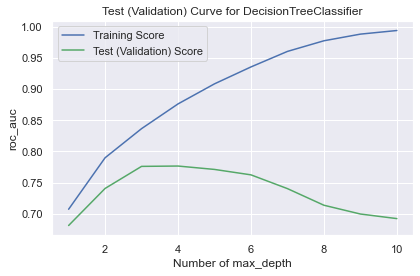

In [41]:
val_curve_params(cart_final, X, y, "max_depth", range(1, 11))

Fonksiyonumuzun ön tanımlı değeri roc_auc olduğu için yukarıdaki grafikte roc_auc değerleri çizdirildi. Başka bir scoring seçip deneyelim.

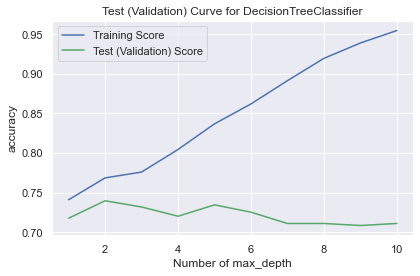

In [42]:
val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring="accuracy")

Peki sadece bir hiperparametre için değil de, elimizde birden fazla hiperparametre olduğu zaman yukarıdaki işlemleri nasıl pratik bir şekilde yapabiliriz?

In [43]:
cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

Hiperparametreleri ve alacağı değerlerin tutulduğu bir liste oluşturduk. Şimdi bu listenin elemanlarını gezip validation curve fonksiyonunu uygulayacağız.

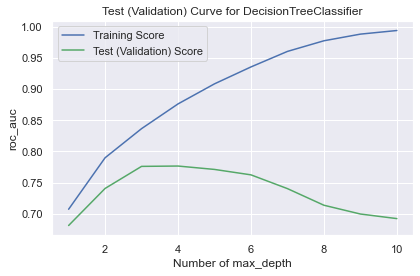

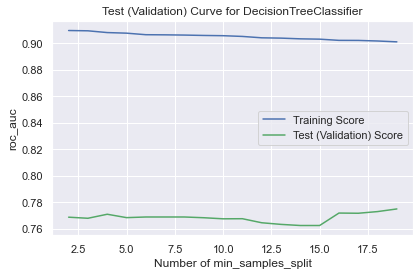

In [44]:
for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, param_name=cart_val_params[i][0], param_range=cart_val_params[i][1])

## 8. Visualizing the Decision Tree

In [45]:
import graphviz

Aşağıdaki fonksiyon daha önce import ettiğimiz bazı metodları getirecek ve bu metodları kullanarak bir png dosyası çıktısı verecek. Bu png dosyasının içerisinde kurmuş olduğumuz model yer alıyor olacak.

In [46]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [47]:
# tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

Yukarıdaki kütüphane bende hata vermekte. Çözümünü bulamadım, daha sonrasında dönüp tekrar bakacağım.

## 9. Extracting Decision Rules

**Karar Kurallarının Çıkartılması**

Karar ağaçları belirli bir karar kurallarına göre bölünüyordu. Bu kararların neler olduğunu nasıl görebiliriz?

In [48]:
tree_rules = export_text(cart_final, feature_names=list(X.columns))

In [49]:
tree_rules

'|--- Glucose <= 127.50\n|   |--- Age <= 28.50\n|   |   |--- BMI <= 45.40\n|   |   |   |--- BMI <= 30.95\n|   |   |   |   |--- Pregnancies <= 7.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- Pregnancies >  7.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- BMI >  30.95\n|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- DiabetesPedigreeFunction >  0.50\n|   |   |   |   |   |--- class: 0\n|   |   |--- BMI >  45.40\n|   |   |   |--- BloodPressure <= 99.00\n|   |   |   |   |--- class: 1\n|   |   |   |--- BloodPressure >  99.00\n|   |   |   |   |--- class: 0\n|   |--- Age >  28.50\n|   |   |--- BMI <= 26.35\n|   |   |   |--- BMI <= 9.65\n|   |   |   |   |--- class: 1\n|   |   |   |--- BMI >  9.65\n|   |   |   |   |--- class: 0\n|   |   |--- BMI >  26.35\n|   |   |   |--- Glucose <= 99.50\n|   |   |   |   |--- Glucose <= 28.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- Glucose >  28.50\n|   |   |  

Yukarıdaki çıktıyı bir de pycharm üzerinden deneyip şekline bakmak gerekiyor. Bu çıktıların python, excel ve sql kodlarına nasıl erişebiliriz?

## 10. Extracting Python Codes of Decision Rules

**Karar Kurallarının Python Kodunu Çıkartmak**

Bu kısım için kullanacağımız kodlar sklearn kütüphanesinin 0.23.1 sürümünde çalışıyor. Eğer sklearn daha güncel bir sürümdeyse öncelikle sürümü düşürmek gerekli!

pip install scikit-learn==0.23.1

In [53]:
import sklearn
sklearn.__version__

'0.23.1'

In [54]:
print(skompile(cart_final.predict).to('python/code'))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



Yukarıdaki çıktı, karar ağacımızın fonksiyonlaştırılabilecek olan karar kurallarıdır. Yani yukarıdaki kodu bir fonksiyon aracılığı ile tanımlayıp, fonksiyona değerler sorduğumuzda tahmin edebiliyor olacağız. Yani modeli, pythonda bu kodları çalıştırabiliyor olacağız.

Yukarıdaki kodlar python içindi. Şimdi de SQL kodlarını çıkartmak istediğimizi düşünelim. sqlite için kodlar çıkacak fakat diğer sqller için de kullanılabilir veya küçük dokunuşlar ile kullanılabilir hale getirilebilir.

In [55]:
print(skompile(cart_final.predict).to('sqlalchemy/sqlite'))

SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 <= 7.5) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x3 <= 99.0) THEN 1 ELSE 0 END END ELSE CASE WHEN (x6 <= 26.350000381469727) THEN CASE WHEN (x6 <= 9.649999618530273) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= 99.5) THEN CASE WHEN (x2 <= 28.5) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.5609999895095825) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= 29.949999809265137) THEN CASE WHEN (x2 <= 145.5) THEN CASE WHEN (x5 <= 132.5) THEN CASE WHEN (x6 <= 28.149999618530273) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= 25.5) THEN 0 ELSE CASE WHEN (x8 <= 61.0) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 157.5) THEN CASE WHEN (x8 <= 30.5) THEN CASE WHEN (x3 <= 61.0) THEN 1 ELSE 0 END ELSE 1 END ELSE CASE WHEN (x5 <= 629.5) THEN 1 ELSE 0 END END END END AS y 
FROM data


In [56]:
# excel için
print(skompile(cart_final.predict).to('excel'))

A1=IF((x2<=127.5),IF((x ...418 chars skipped... ((x5<=629.5),1,0))))


## 11. Prediction using Python Codes

Yukarıda modelimizden oluşturduğumuz python kodlarını kullanarak tahminler yapmaya çalışacağız.

In [57]:
def predict_with_rules(x):
    return (((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )

In [58]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Karşımıza bir hastanın geldiğini ve yukarıdaki değişkenler içerisinden değerlerinin elimizde olduğunu düşünelim.

In [59]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

Bu değerleri yukarıdaki fonksiyona vererek tahmin yapacağız

In [60]:
predict_with_rules(x)

1

## 12. Saving and Loading Model

Bir model kurduk ve bu modeli daha sonra kullanmak istiyoruz. Her kullanmak istediğimizde yukarıdaki işlemleri tekrar tekrar yapıp tekrar modeller oluşturmak yerine, oluşturduğumuz final modeli kaydedip daha sonrasında kaydettiğimiz final modeli çağırarak tahminler yaparız.

In [61]:
joblib.dump(cart_final, "cart_final.pkl")

['cart_final.pkl']

Bu projenin bulunduğu dosyaya *cart_final.pkl* adında bir dosya kaydedildi. Bu bizim modelimiz. Şimdi bu modeli diskten okuyalım.

In [62]:
cart_model_from_disc = joblib.load("cart_final.pkl")

Daha öncesinde kurmuş olduğumuz bir modeli *cart_final.pkl* ismiyle kaydetmiştik. Şu anda bu dosyayı kullanarak daha önceki kormuş olduğum modeli *cart_model_from_disc* içerisinde çağırdık. Hiçbir feature engineering data preprocessing vs işlemi yapmadan bu modeli kullanabiliriz.

In [63]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

In [64]:
cart_model_from_disc.predict(pd.DataFrame(x).T) # predict kullandığımız için gözlem birimini df şeklinde vermemiz gerekli

array([1], dtype=int64)